In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import koreanize_matplotlib
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [2]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
    📌 Q1. 연령대별 허리둘레에 대한 기술통계 구하기
</span>

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)
df['연령대'].value_counts()

연령대
40~44세    130931
50~54세    129849
45~49세    118368
55~59세    112183
60~64세    106507
35~39세     84691
30~34세     77665
25~29세     64958
65~69세     53627
70~74세     51588
75~79세     25986
20~24세     23255
80~84세     16228
85세+        4164
Name: count, dtype: int64

In [5]:
df.groupby(by='연령대')['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화하기
</span>

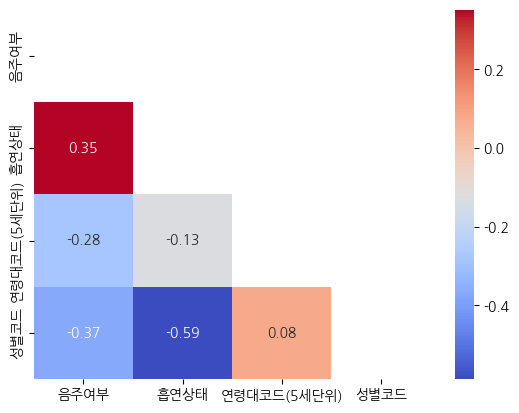

In [6]:
df_corr = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']].corr()
mask = np.triu(np.ones_like(df_corr))

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask);

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q3. 흡연하는 사람과 음주하는 사람들의 수에 얼마나 차이가 있는지 비교하기
</span>

- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. 
- replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 
- 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [7]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않는다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [8]:
df['흡연'] = df['흡연상태'].map(smoke)
df['음주'] = df['음주여부'].map(drink)

<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q3-1. Groupby를 활용한 해결방법
</span>

In [9]:
display(df.groupby(by='음주')['흡연'].value_counts().unstack())

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q3-2. pivot_table을 활용한 해결방법
</span>

In [10]:
display(df.pivot_table(index='음주', columns='흡연', aggfunc='size', fill_value=0))

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q3-3. cross-tab을 활용한 해결방법
</span>

In [11]:
display(pd.crosstab(index=df['음주'], columns=df['흡연']))

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<span style="font-size: 1em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q3. 그래프 시각화
</span>

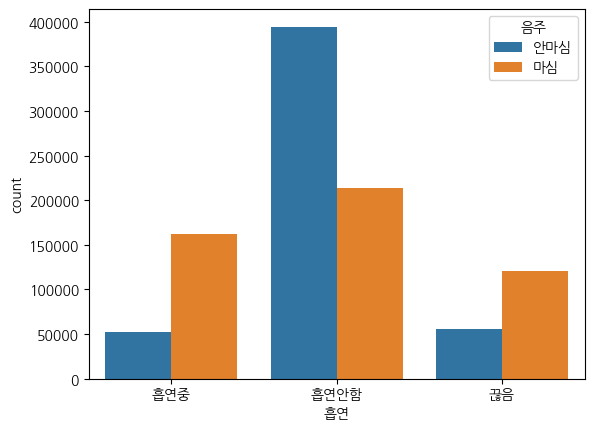

In [12]:
sns.countplot(data=df, x='흡연', hue='음주');

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화하기
</span>

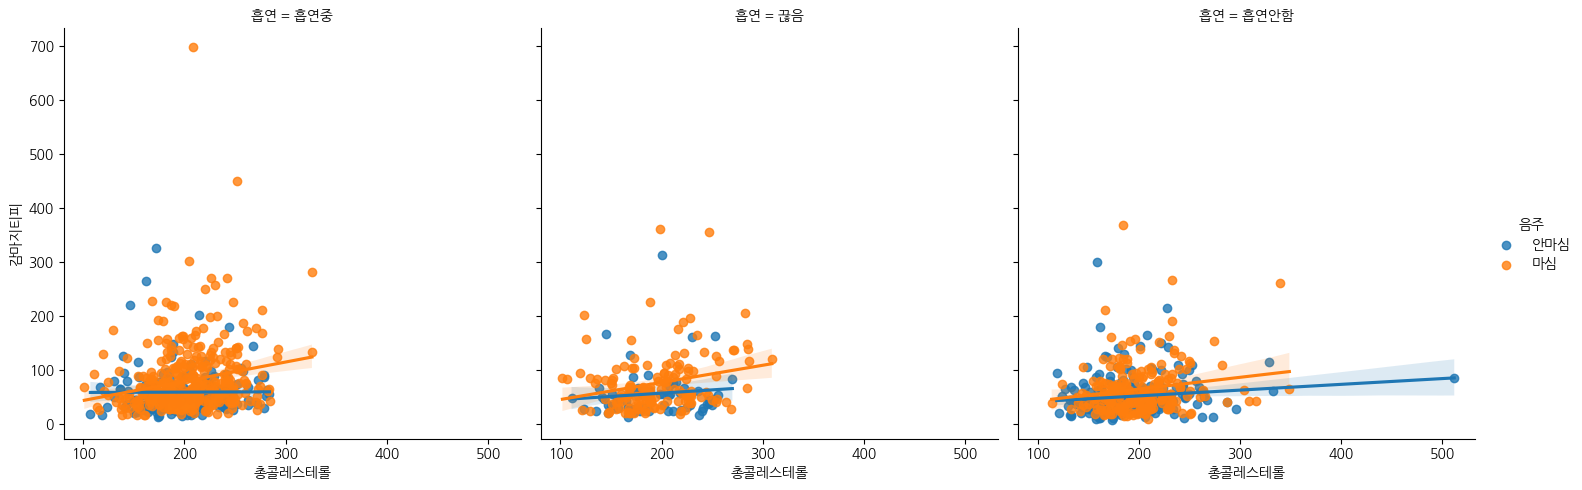

In [13]:
df_over_120 = df[df['체중(5Kg 단위)'] >= 120].copy()
sns.lmplot(data = df_over_120, x = '총콜레스테롤', y = '감마지티피', col = '흡연', hue = '음주');

<span style="font-size: 2em; font-weight: bold; background-color: #4A90E2; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Arial', sans-serif;">
📌Q5. 연령대, 성별 별 좌우 평균 시력을 시각화하기
</span>

In [14]:
filter_blind = df[(df['시력(좌)'] != 9.9) & (df['시력(좌)'] != 9.9)]
filter_blind_mean = filter_blind.groupby(by=['연령대', '성별코드'])[['시력(좌)', '시력(우)']].mean()

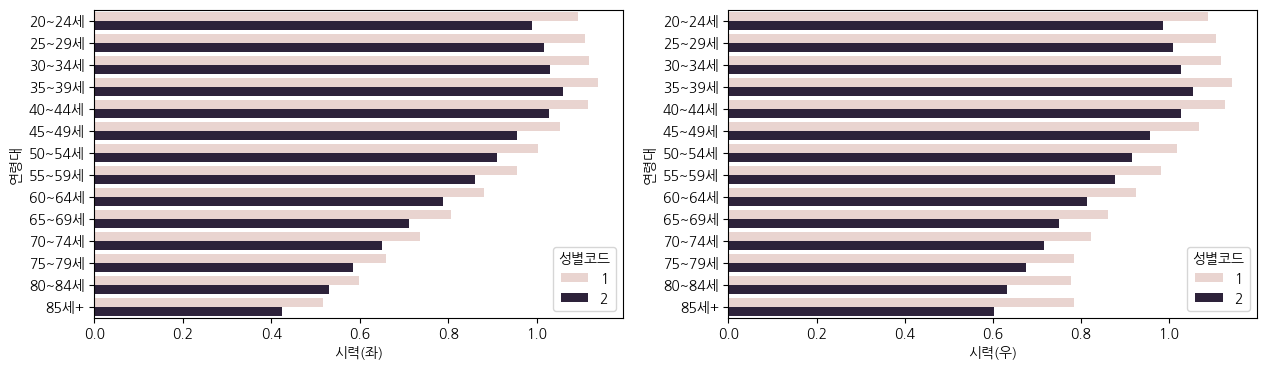

In [15]:
fig, axs = plt.subplots(ncols = 2, figsize=(15, 4))

sns.barplot(data=filter_blind_mean, x='시력(좌)', y='연령대',hue='성별코드', ax=axs[0]);
sns.barplot(data=filter_blind_mean, x='시력(우)', y='연령대',hue='성별코드', ax=axs[1]);

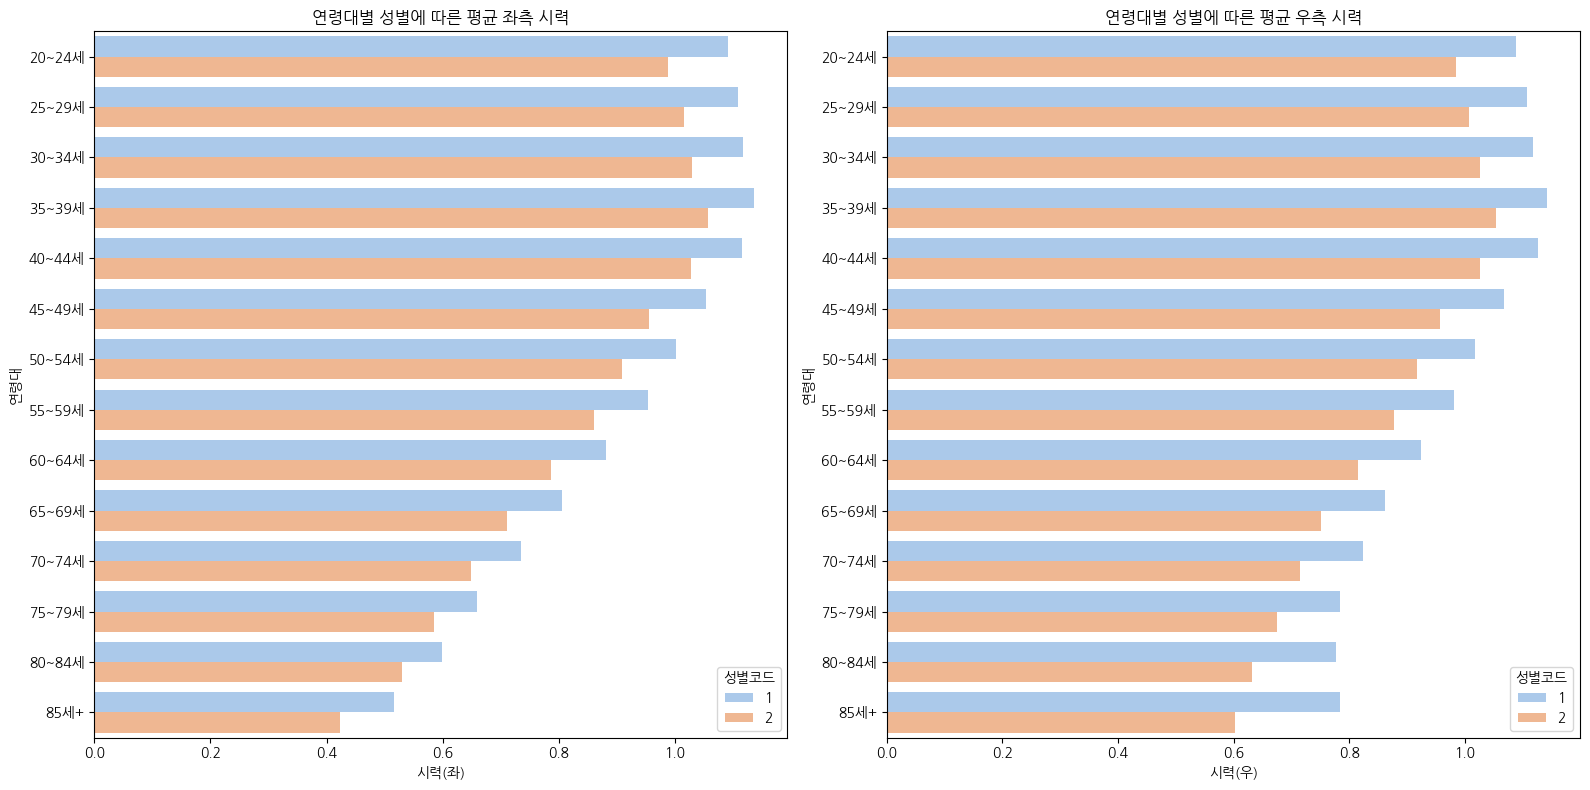

In [16]:
fig, axs = plt.subplots(1,2,figsize = (16,8))

sns.barplot(x = "시력(좌)", y = "연령대" ,hue = '성별코드', data = filter_blind_mean, ax = axs[0], palette = 'pastel')
axs[0].set_title('연령대별 성별에 따른 평균 좌측 시력')

sns.barplot(x = "시력(우)", y = "연령대" ,hue = '성별코드', data = filter_blind_mean, ax = axs[1], palette = "pastel")
axs[1].set_title('연령대별 성별에 따른 평균 우측 시력')

plt.tight_layout()
plt.show()
